In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from xml.etree import ElementTree as ET
from xml_generation.utils import save_xml_file
from shared_utils.general import gen_models_folder_path
from utils import compute_OABC, compute_interpolation_polygon, draw_OABC_schematics, compute_boxes_features, boxes_to_XML

In [3]:
def generate_contact_boxes(file_name, l, L, thickness, depth, n_box, xyz_slack=[0, 0, 0], xyz_sign=[1, 1, 1], color_seq=['r','g','b'],
 prefix=None, def_class=None, directory_path=None, must_save=True, must_print=False, must_plot=False):

    '''
    NB: all geometric computations are carried out in a 2D frame centered on C
        with X_axis pointing toward the right, Y_axis toward the top 

        Then, one adds the 3rd dimension using a Z_axis pointing toward
        "our eye"

        Finally, xyz_slack, xyz_sign and color_seq are applied to adapt the 
        position and the orientation of the frame in the generated XML

    Warning: There may be unexpected behavior if C is below AB 
            (due to the use of arccos to compute thetas)
    '''
    # compute O, A, B, C coordinates in 2D space
    O, A, B, C = compute_OABC(l, L)

    # list of the points of the polygon interpolating the circle
    polygon = compute_interpolation_polygon(n_box+1, O, A, C)
    
    # compute attributes of the boxes (3D space)
    positions, size, thetas = compute_boxes_features(polygon, thickness, depth, xyz_slack, xyz_sign)

    root = boxes_to_XML(positions, size, thetas, color_seq, def_class, prefix)

    if(must_save):
        if directory_path is None:
            directory_path = os.path.join(gen_models_folder_path(), "arm_supports")
            
        save_xml_file(root, file_name, directory_path)
    
    if(must_print):
        # print only boxes element
        for geom in root:
            print(ET.tostring(geom, encoding="unicode"))

    if(must_plot):
        # draw a schematic for better visualization
        draw_OABC_schematics(O, A, B, C, polygon, xyz_sign, color_seq)

### Arm supports in setup_guide convention

In [4]:
setup_bin_dir = os.path.join(gen_models_folder_path(), "setup_guide")
assert os.path.isdir(setup_bin_dir)

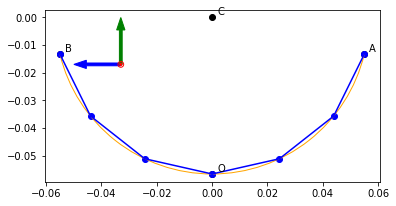

In [5]:
# generate upper arm support in new simplified frame (model version > 10)
L_ua, l_ua = .110, .070 # meshlab measures are in millimeter
thickness_ua = .01
dep_ua = .1

xyz_slack = [.0, .02, -dep_ua/2-.168]
xyz_sign=[-1, 1, 1]
color_seq = ['b','g','r']

def_class = "ua_support"
file_name = "upper_arm_support.xml"

generate_contact_boxes(file_name=file_name ,l=l_ua, L=L_ua, thickness=thickness_ua, depth=dep_ua, n_box=6, xyz_slack=xyz_slack, xyz_sign=xyz_sign, color_seq=color_seq, prefix="ua", def_class=def_class, directory_path=setup_bin_dir, must_save=True, must_plot=True)

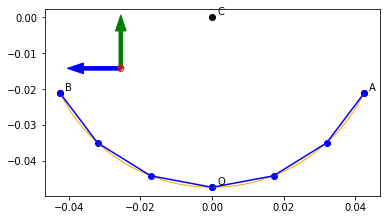

In [6]:
# generate lower arm support in new simplified frames (model version > 10)
L_la, l_la = .085, .050 # meshlab measures are in millimeter
thickness_la = .01
dep_la = .1

xyz_slack = [.0, .0, -dep_la/2+.125]
xyz_sign=[-1, 1, 1]
color_seq = ['b', 'g', 'r']

def_class = "la_support"
file_name = "lower_arm_support.xml"

generate_contact_boxes(file_name=file_name ,l=l_la, L=L_la, thickness=thickness_la, depth=dep_la, n_box=6, xyz_slack=xyz_slack, xyz_sign=xyz_sign, color_seq=color_seq, prefix="la", def_class=def_class, directory_path=setup_bin_dir, must_save=True, must_plot=True)

### Arm supports in `nesm_with_patient.xacro` convention

**Disclaimer**: the frames of the exoskeleton have been modified several times along the development. The convention used here corresponds to the latest version of the exoskeleton.

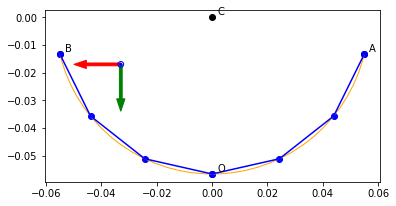

In [7]:
# generate upper arm support in new simplified frame (model version > 10)
L_ua, l_ua = .110, .070 # meshlab measures are in millimeter
thickness_ua = .01
dep_ua = .1

xyz_slack = [.0, .02, -dep_ua/2-.133]
xyz_sign=[-1, -1, 1]
color_seq = ['r','g','b']

def_class = "ua_support"
file_name = "upper_arm_support.xml"

generate_contact_boxes(file_name=file_name ,l=l_ua, L=L_ua, thickness=thickness_ua, depth=dep_ua, n_box=6, xyz_slack=xyz_slack, xyz_sign=xyz_sign, color_seq=color_seq, prefix="ua", def_class=def_class, must_save=True, must_plot=True)

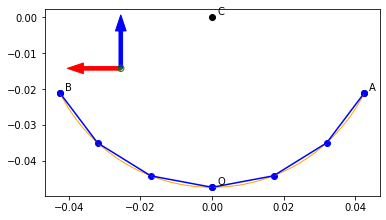

In [8]:
# generate lower arm support in new simplified frames (model version > 10)
L_la, l_la = .085, .050 # meshlab measures are in millimeter
thickness_la = .01
dep_la = .1

xyz_slack = [.0, .0, -dep_la/2+.12]
xyz_sign=[-1, 1, 1]
color_seq = ['r', 'b', 'g']

def_class = "la_support"
file_name = "lower_arm_support.xml"

generate_contact_boxes(file_name=file_name ,l=l_la, L=L_la, thickness=thickness_la, depth=dep_la, n_box=6, xyz_slack=xyz_slack, xyz_sign=xyz_sign, color_seq=color_seq, prefix="la", def_class=def_class, must_save=True, must_plot=True)